# ***APLICAÇÃO DO AUTOENCODER UTILIZANDO O DATASET MNIST COM KERAS E POSTERIOR CLASSIFICAÇÃO DOS DADOS PROCESSADOS***

**-> IMPORTAÇÃO DAS BIBLIOTECAS**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.layers import Dense, Input, Activation, Dropout
from keras.models import Model
from keras.models import Sequential

**-> CARREGAMENTO E TRATAMENTO DOS DADOS**

In [ ]:
# Carregando o conjunto de dados MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape)
print(x_test.shape)

valMax = x_train.max()

# Normalizando os valores dos pixels para o intervalo [0, 1]
x_train = x_train / valMax
x_test = x_test / valMax

# Transformando as imagens em vetores unidimensionais (784 pixels)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Aplicação de ruído nos dados e armazenando em variáveis acessórias
factor = 0.1
x_train_noisy = x_train + factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

print(x_train.shape)
print(x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [ ]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

-> VISUALIZAÇÃO DE ALGUMAS IMAGENS PARA TREINAMENTO

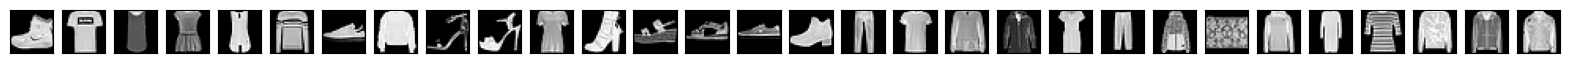

In [ ]:
# Visualizando algumas imagens originais
n = 30
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem de entrada com ruído
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**-> CONSTRUÇÃO DO MODELO AUTOENCODER COM DADOS ORIGINAIS**

In [ ]:
# Definindo a dimensão da representação codificada
n_latent = 60

# Criando o modelo do autoencoder
model = Sequential()
model.add(Dense(units = 400, input_dim=x_train.shape[1], activation="relu"))
model.add(Dense(units = 200, activation="relu"))
model.add(Dense(units = n_latent, activation="relu"))
model.add(Dense(units = 200, activation="relu"))
model.add(Dense(units = 400, activation="relu"))
model.add(Dense(units = x_train.shape[1], activation="sigmoid"))

# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy')

**-> TREINAMENTO COM DADOS ORIGINAIS E VALIDAÇÃO DO MODELO TREINADO COM DADOS SEM RUÍDOS**

In [ ]:
# Treinando o autoencoder
model.fit(x_train, x_train, epochs=30, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Codificando e decodificando as imagens de teste sem ruído
encoded_imgs = model.predict(x_test)

Epoch 1/30
235/235 [==============================] - 12s 46ms/step - loss: 0.3514 - val_loss: 0.3072
Epoch 2/30
235/235 [==============================] - 11s 48ms/step - loss: 0.2987 - val_loss: 0.2963
Epoch 3/30
235/235 [==============================] - 10s 41ms/step - loss: 0.2898 - val_loss: 0.2889
Epoch 4/30
235/235 [==============================] - 11s 47ms/step - loss: 0.2849 - val_loss: 0.2849
Epoch 5/30
235/235 [==============================] - 11s 45ms/step - loss: 0.2814 - val_loss: 0.2819
Epoch 6/30
235/235 [==============================] - 11s 46ms/step - loss: 0.2789 - val_loss: 0.2803
Epoch 7/30
235/235 [==============================] - 9s 39ms/step - loss: 0.2770 - val_loss: 0.2785
Epoch 8/30
235/235 [==============================] - 11s 46ms/step - loss: 0.2755 - val_loss: 0.2768
Epoch 9/30
235/235 [==============================] - 10s 44ms/step - loss: 0.2743 - val_loss: 0.2760
Epoch 10/30
235/235 [==============================] - 10s 42ms/step - loss: 0.2732

**-> GRÁFICO COMPARATIVO DE DADOS ORIGINAL E DADOS GERADOS EM FORMA DE IMAGEM - SEM RUÍDO GERADO**

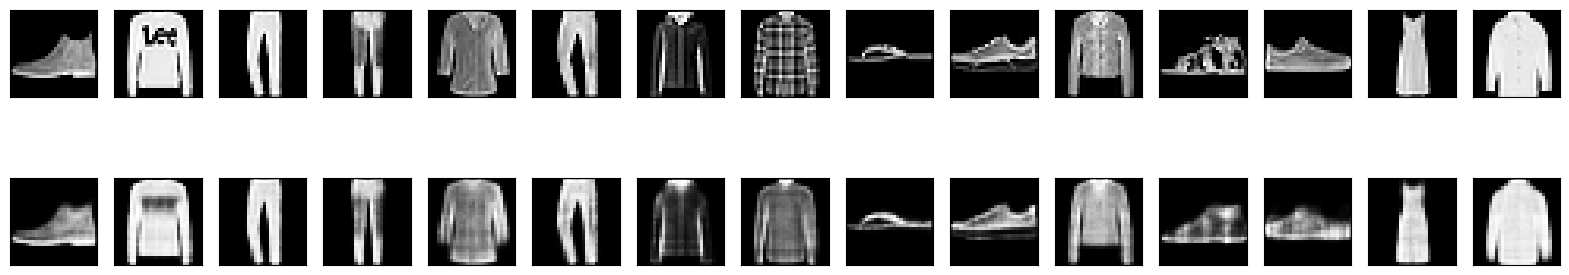

In [ ]:
# Visualizando algumas imagens originais sem ruído e reconstruídas
n = 15
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

-> VALIDAÇÃO COM DADOS COM RUÍDO USANDO O MESMO MODELO TREINADO ORIGINAL

In [ ]:
# Codificando e decodificando as imagens de teste com ruído
encoded_imgs = model.predict(x_test_noisy)

313/313 [==============================] - 1s 4ms/step


**-> GRÁFICO COMPARATIVO DE DADOS ORIGINAL E DADOS GERADOS EM FORMA DE IMAGEM - COM RUÍDO GERADO**

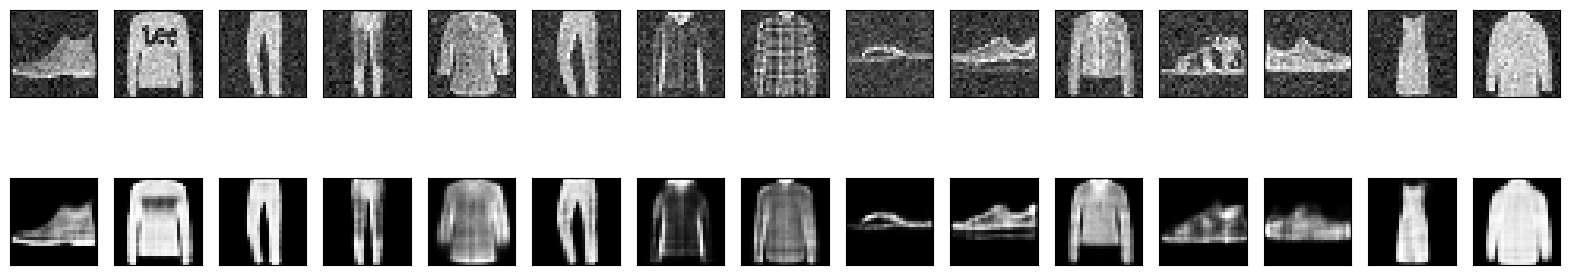

In [ ]:
# Visualizando algumas imagens originais com ruído e reconstruídas
n = 15
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem de entrada com ruído
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída com redução do ruído
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

**-> CRIANDO UM MODELO DE CLASSIFICAÇÃO PARA TESTAR AS AMOSTRAS RUIDOSAS, AMOSTRAS ORIGINAIS E AS AMOSTRAS RECUPERADAS DO RUÍDO**

In [ ]:
#dropout = 0.45
num_labels = len(np.unique(y_train))

model2 = Sequential()
model2.add(Dense(units=400, input_dim=x_train.shape[1], activation='relu'))
#model2.add(Dropout(dropout)) #Essa camada ajuda a evitar overfitting durante o treinamento, desligando aleatoriamente um certo número de neurônios durante cada passagem de treinamento
model2.add(Dense(units=100, activation='relu'))
#model2.add(Dropout(dropout))
model2.add(Dense(units=num_labels, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model2.fit(x_train, y_train, epochs=40, batch_size=256)

Epoch 1/40
235/235 [==============================] - 6s 20ms/step - loss: 0.5374 - accuracy: 0.8128
Epoch 2/40
235/235 [==============================] - 3s 15ms/step - loss: 0.3796 - accuracy: 0.8652
Epoch 3/40
235/235 [==============================] - 3s 15ms/step - loss: 0.3371 - accuracy: 0.8781
Epoch 4/40
235/235 [==============================] - 5s 20ms/step - loss: 0.3071 - accuracy: 0.8883
Epoch 5/40
235/235 [==============================] - 3s 14ms/step - loss: 0.2920 - accuracy: 0.8922
Epoch 6/40
235/235 [==============================] - 3s 15ms/step - loss: 0.2719 - accuracy: 0.8993
Epoch 7/40
235/235 [==============================] - 3s 15ms/step - loss: 0.2584 - accuracy: 0.9047
Epoch 8/40
235/235 [==============================] - 5s 21ms/step - loss: 0.2507 - accuracy: 0.9064
Epoch 9/40
235/235 [==============================] - 3s 14ms/step - loss: 0.2385 - accuracy: 0.9114
Epoch 10/40
235/235 [==============================] - 3s 15ms/step - loss: 0.2282 - accura

In [ ]:
loss, acc = model2.evaluate(x_test, y_test)
print("\nTeste de Acurácia Classificação sem Ruído: %.1f%%" % (100.0 * acc))
loss, acc = model2.evaluate(x_test_noisy, y_test)
print("\nTeste de Acurácia Classificação com Ruído: %.1f%%" % (100.0 * acc))
loss, acc = model2.evaluate(encoded_imgs, y_test)
print("\nTeste de Acurácia Classificação das Imagens Recuperadas do Ruído: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 2s 5ms/step - loss: 0.4506 - accuracy: 0.8912

Teste de Acurácia Classificação sem Ruído: 89.1%
313/313 [==============================] - 1s 3ms/step - loss: 0.5731 - accuracy: 0.8697

Teste de Acurácia Classificação com Ruído: 87.0%
313/313 [==============================] - 2s 5ms/step - loss: 0.5556 - accuracy: 0.8682

Teste de Acurácia Classificação das Imagens Recuperadas do Ruído: 86.8%


**-> APRESENTANDO AS MÉTRICAS COM O SKLEARN**

313/313 [==============================] - 1s 3ms/step
Avaliação da Classificação
Acurácia: 0.8912
MSE:  1.5761
Matriz de confusão das amostras não apresentadas no treinamento:
 [[854   3  16  20   3   2  97   0   5   0]
 [  3 988   0   6   0   0   2   0   1   0]
 [ 24   2 832  10  79   0  52   0   1   0]
 [ 26  10  23 882  30   0  26   0   3   0]
 [  4   2 100  27 817   0  49   0   1   0]
 [  1   0   0   1   0 956   0  23   0  19]
 [153   2  77  24  56   0 680   0   8   0]
 [  0   0   0   0   0   9   0 975   0  16]
 [  9   0   3   1   3   1   5   3 975   0]
 [  0   0   0   0   0   5   1  41   0 953]]

Relatório de classificação das amostras não apresentadas no treinamento:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1000
           1       0.98      0.99      0.98      1000
           2       0.79      0.83      0.81      1000
           3       0.91      0.88      0.89      1000
           4       0.83      0.82      0.82   

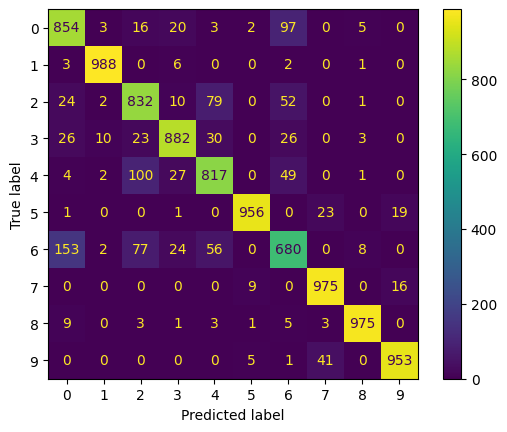

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report, mean_squared_error, ConfusionMatrixDisplay

y_pred = model2.predict(x_test)

#Converter as previsões para classes
y_pred = np.argmax(y_pred, axis=1)

print("Avaliação da Classificação")
print("Acurácia:", accuracy_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print(f"Matriz de confusão das amostras não apresentadas no treinamento:\n {confusion_matrix(y_test, y_pred)}")
print("")
relatorio = classification_report(y_test, y_pred, target_names=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
print("Relatório de classificação das amostras não apresentadas no treinamento:")
print(relatorio)

print(f"Matriz de confusão das amostras não apresentadas no treinamento:\n {confusion_matrix(y_test, y_pred)}")
print("")
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
cm_display.plot()
plt.show()